In [2]:
!pip install datasets
!pip install yfinance
!pip install mpl-finance

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datasets import DatasetDict
# import matplotlib.pyplot as plt

# 爬取證券交易所的股價資料
def fetch_stock_data_exchange(stock_code):
  stock = yf.Ticker(f"{stock_code}.TW")
  data = stock.history(period='max',interval='1d')
  return data

def SMA(data, period=5, column='Close'):
  return data[column].rolling(window=period).mean()

def RSI(data, period=5, column='Close'):
  delta = data[column].diff(1)
  gain = delta.where(delta > 0, 0)
  loss = -delta.where(delta < 0, 0)
  avg_gain = gain.rolling(window=period).mean()
  avg_loss = loss.rolling(window=period).mean()
  RS = avg_gain.div(avg_loss)
  return RS.apply(lambda rs: 100 - (100 / (1+rs)))

def MACD(data, column='Close'):
  dif = data[column].ewm(span=12).mean() - data[column].ewm(span=26).mean()
  return dif.ewm(span=9).mean()

In [4]:
stock_code = '6139'  # 替換為實際的股號
data = fetch_stock_data_exchange(stock_code)
data['5MA'] = SMA(data, 5)
data['20MA'] = SMA(data, 20)
data['5RSI'] = RSI(data, 5)
data['10RSI'] = RSI(data, 10)
data['MACD'] = MACD(data)
data = data.tail(1000)

In [5]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,5MA,20MA,5RSI,10RSI,MACD
Date,,,,,,,,,,,,
2020-08-24 00:00:00+08:00,25.855722,26.152428,25.516631,25.855722,577137,0.0,0.0,25.931247,26.227181,38.362563,43.740060,0.376732
2020-08-25 00:00:00+08:00,26.152428,27.212088,26.152428,26.703451,1980594,0.0,0.0,25.915063,26.271687,48.983547,56.569748,0.343619
2020-08-26 00:00:00+08:00,27.127315,27.635950,26.703450,27.042542,4293131,0.0,0.0,25.982882,26.323032,53.999988,61.908209,0.328512
2020-08-27 00:00:00+08:00,26.957770,27.127317,25.092767,25.516632,4058766,0.0,0.0,26.135473,26.263691,60.000020,46.877720,0.300389
2020-08-28 00:00:00+08:00,24.753674,25.050378,23.905946,24.838448,4506529,0.0,0.0,25.991359,26.176510,40.229878,40.610663,0.254078
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25 00:00:00+08:00,217.500000,218.000000,213.500000,214.000000,1619562,0.0,0.0,214.900000,218.857244,68.000000,46.590909,-4.211234
2024-09-26 00:00:00+08:00,214.000000,218.500000,212.500000,216.000000,1796364,0.0,0.0,215.700000,217.861915,66.666667,84.905660,-4.077077
2024-09-27 00:00:00+08:00,217.500000,218.000000,213.000000,213.000000,1382176,0.0,0.0,215.200000,216.644370,39.130435,72.549020,-3.947802


In [6]:
data.index = data.index.format(formatter=lambda x: x.strftime('%Y-%m-%d'))

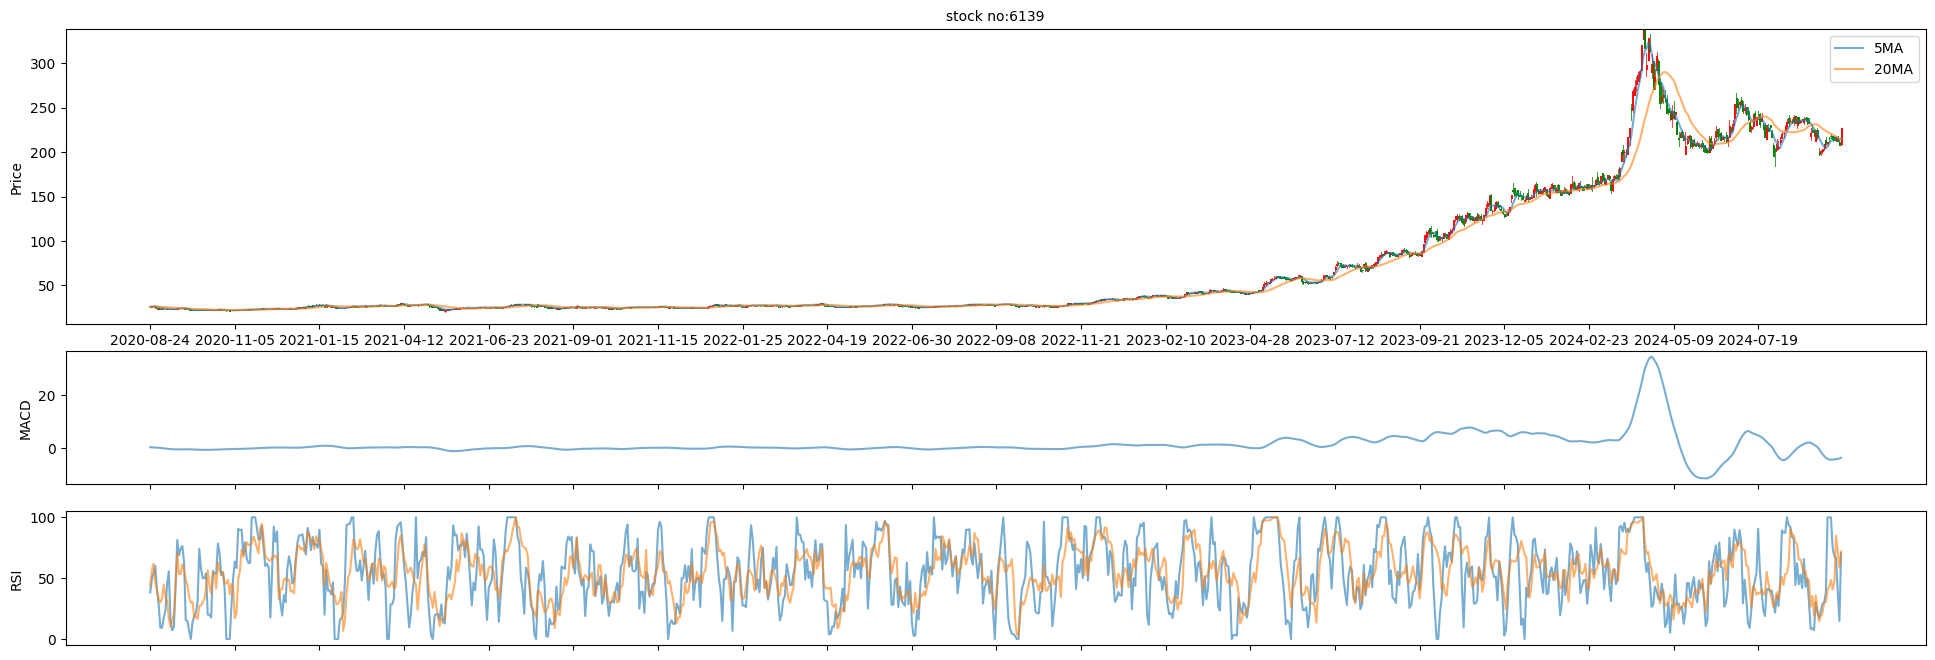

In [7]:
import mpl_finance as mpf
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(24, 8))
gs = gridspec.GridSpec(4,1)
ax1 = plt.subplot(gs[0:2,:])
mpf.candlestick2_ochl(ax1, data['Open'], data['Close'], data['High'], data['Low'], width=0.6, colorup = 'r', colordown = 'g', alpha=0.75)
ax1.plot(data['5MA'],alpha=0.6, label='5MA')
ax1.plot(data['20MA'],alpha=0.6, label='20MA')
ax1.set_xticks(range(0, len(data.index), 50))
ax1.set_xticklabels(data.index[::50])
ax1.set_title('stock no:'+ stock_code,size=10)
ax1.set_ylabel('Price')
ax1.set_xlabel('')
ax1.legend()

ax2= plt.subplot(gs[2:3,:],sharex=ax1)
ax2.plot(data['MACD'],alpha=0.6)
ax2.set_ylabel('MACD')
ax2.set_xticks(range(0, len(data.index), 50))
ax2.set_xticklabels(data.index[::50])
plt.setp(ax2.get_xticklabels(), visible=False)

ax3=plt.subplot(gs[3,:],sharex=ax1)
ax3.plot(data['5RSI'],alpha=0.6)
ax3.plot(data['10RSI'],alpha=0.6)
ax3.set_ylabel('RSI') #設定Y座標名稱
ax3.set_xticks(range(0, len(data.index), 50))
ax3.set_xticklabels(data.index[::50])
plt.setp(ax3.get_xticklabels(), visible=False) #隱藏ax3 x軸

plt.show() #show圖

In [8]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression

In [9]:
df_X = data[['Close', '5MA', '20MA', '5RSI', '10RSI', 'MACD']].iloc[:-1,:-1]
df_y = data[['Close']].iloc[1:,-1]

X = df_X.to_numpy()
y = df_y.to_numpy()

num_data = df_X.shape[0]
split_ratio = 0.8
ind_split = int(split_ratio * num_data)

X_train = X[:ind_split]
y_train = y[:ind_split].reshape(-1,1)
X_test = X[ind_split:]
y_test = y[ind_split:].reshape(-1,1)

split_time = df_X.index[ind_split]

In [10]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
predictions = reg_linear.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 7.5692192584923985
Mean Squared Error: 115.81113434362138
R2 Score: 0.9388363264113317


In [11]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_prediction = tree.predict(X_test)
mae = mean_absolute_error(y_test, tree_prediction)
mse = mean_squared_error(y_test, tree_prediction)
r2 = r2_score(y_test, tree_prediction)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 66.96165451049805
Mean Squared Error: 6332.426751575012
R2 Score: -2.3443630878209896


In [12]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict and evaluate
random_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, random_pred)
mse = mean_squared_error(y_test, random_pred)
r2 = r2_score(y_test, random_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 68.5947642124176
Mean Squared Error: 6548.415636383047
R2 Score: -2.4584339301804294


In [13]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,5MA,20MA,5RSI,10RSI,MACD
2020-08-24,25.855722,26.152428,25.516631,25.855722,577137,0.0,0.0,25.931247,26.227181,38.362563,43.740060,0.376732
2020-08-25,26.152428,27.212088,26.152428,26.703451,1980594,0.0,0.0,25.915063,26.271687,48.983547,56.569748,0.343619
2020-08-26,27.127315,27.635950,26.703450,27.042542,4293131,0.0,0.0,25.982882,26.323032,53.999988,61.908209,0.328512
2020-08-27,26.957770,27.127317,25.092767,25.516632,4058766,0.0,0.0,26.135473,26.263691,60.000020,46.877720,0.300389
2020-08-28,24.753674,25.050378,23.905946,24.838448,4506529,0.0,0.0,25.991359,26.176510,40.229878,40.610663,0.254078
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-25,217.500000,218.000000,213.500000,214.000000,1619562,0.0,0.0,214.900000,218.857244,68.000000,46.590909,-4.211234
2024-09-26,214.000000,218.500000,212.500000,216.000000,1796364,0.0,0.0,215.700000,217.861915,66.666667,84.905660,-4.077077
2024-09-27,217.500000,218.000000,213.000000,213.000000,1382176,0.0,0.0,215.200000,216.644370,39.130435,72.549020,-3.947802
2024-09-30,211.000000,214.000000,208.500000,208.500000,1382708,0.0,0.0,213.300000,215.225896,14.814815,58.928571,-3.891161


In [16]:
X = []
y = []
tmp = []
count = 1
for i, d in data.iterrows():
  tmp += d[['5MA', '20MA', '5RSI', '10RSI', 'MACD']].to_list()
  if count % 3 == 0:
    X.append(tmp)
    y.append(d['Close'])
    tmp = []

  count += 1

In [24]:
X = np.array(X)
y = np.array(y)

num_data = X.shape[0]
split_ratio = 0.8
ind_split = int(split_ratio * num_data)

X_train = X[:ind_split]
y_train = y[:ind_split].reshape(-1,1)
X_test = X[ind_split:]
y_test = y[ind_split:].reshape(-1,1)

split_time = df_X.index[ind_split]

In [26]:
reg_linear = LinearRegression()
reg_linear.fit(X_train, y_train)
predictions = reg_linear.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 1.3161078627126856
Mean Squared Error: 2.4370561845739283
R2 Score: 0.9987070157187887


In [27]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
tree_prediction = tree.predict(X_test)
mae = mean_absolute_error(y_test, tree_prediction)
mse = mean_squared_error(y_test, tree_prediction)
r2 = r2_score(y_test, tree_prediction)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 65.8538000761573
Mean Squared Error: 6127.85612332168
R2 Score: -2.251144432012386


In [28]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Predict and evaluate
random_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, random_pred)
mse = mean_squared_error(y_test, random_pred)
r2 = r2_score(y_test, random_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 70.64653603795749
Mean Squared Error: 6809.271809973619
R2 Score: -2.612670677237523
